In [8]:
import geopandas as gpd
import rioxarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors as pltc
import rasterio
import pandas as pd
import numpy as np

In [15]:
phen = pd.read_csv('data/clusters_phenoshape.csv')
lsp  = pd.read_csv('data/clusters_LSP.csv')
dem  = pd.read_csv('data/clusters_dem.csv')

In [58]:
# from 1 to 365, total of 52 numbers
doy = np.linspace(1, 365, 52)
# doy as integer numbers
doy = doy.astype(int)

# add dpy to clolumns
phen.columns = ['cluster', *doy]
phen.columns

Index(['cluster',         1,         8,        15,        22,        29,
              36,        43,        50,        58,        65,        72,
              79,        86,        93,       100,       108,       115,
             122,       129,       136,       143,       150,       158,
             165,       172,       179,       186,       193,       200,
             207,       215,       222,       229,       236,       243,
             250,       257,       265,       272,       279,       286,
             293,       300,       307,       315,       322,       329,
             336,       343,       350,       357,       365],
      dtype='object')

In [59]:
# obtain mean and std of phenology
mean_phen = phen.groupby('cluster').mean()
std_phen  = phen.groupby('cluster').std()

In [60]:
# obtain mean and std of LSP
mean_lsp = lsp.groupby('cluster').mean()
std_lsp  = lsp.groupby('cluster').std()

mean_lsp.head()

,sos,pos,eos,vsos,vpos,veos,los,msp,mau,vmsp,vmau,ampl,ios,rog,ros,sw
cluster,,,,,,,,,,,,,,,,
1.0,102.044187,170.126639,243.082983,0.978915,1.488051,1.006211,152.616047,134.940397,182.696472,1.213732,1.179863,1.163653,159.806884,0.009039,-0.005664,-0.223432
2.0,106.529201,182.267509,270.721516,0.893344,1.541491,1.084585,165.854363,143.288499,223.485376,1.297919,1.299002,1.062140,198.796724,0.009786,-0.005310,-0.522436
3.0,110.738941,201.206004,267.201948,0.329283,0.873382,0.378875,163.489466,155.063460,221.346006,0.598611,0.617362,1.153898,93.272039,0.007409,-0.009038,-0.452973
4.0,45.360944,86.774321,185.038321,1.188697,1.526914,0.508680,140.307797,64.030069,133.287041,1.337835,0.858979,1.150850,134.421759,0.008479,-0.011039,-0.256929
5.0,117.758108,207.585404,286.532930,0.754817,1.195354,0.895269,169.302655,161.579438,244.891194,0.986407,1.014143,0.746683,157.807684,0.005696,-0.004162,-0.380230


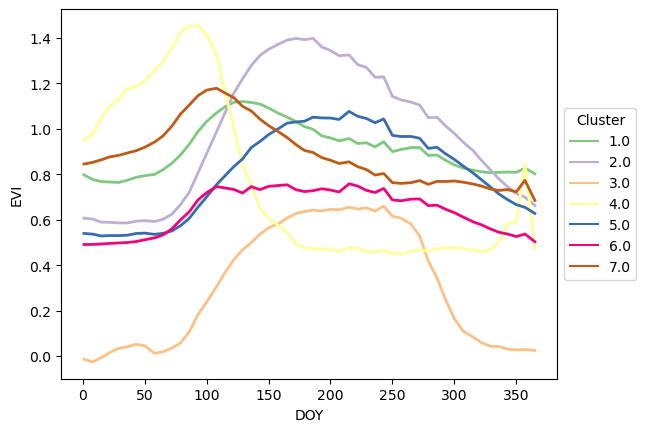

In [63]:
col = ['#7fc97f','#beaed4','#fdc086','#ffff99','#386cb0','#f0027f','#bf5b17']

ax = mean_phen.T.plot(color=col)
ax.set_xlabel("DOY")
ax.set_ylabel("EVI")
# legend title
ax.legend(title='Cluster', loc='center left', bbox_to_anchor=(1, 0.5))
# wigth of lines
for line in ax.lines:
    line.set_linewidth(2)

plt.savefig('figures/meanPhenoCluster.png', dpi=300)

In [33]:
phen.shape[1]

53

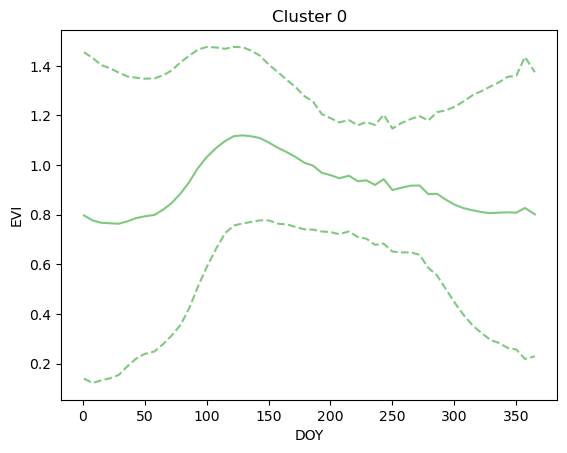

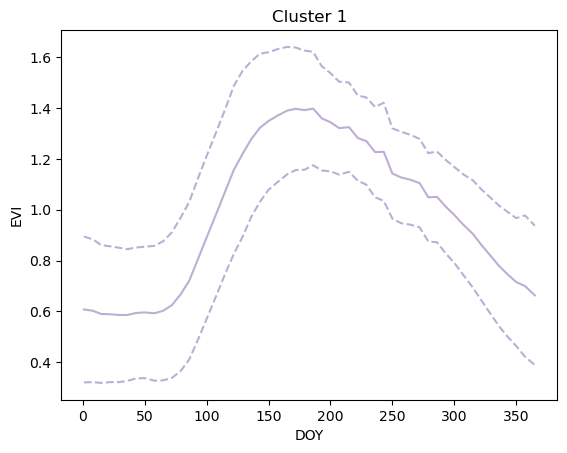

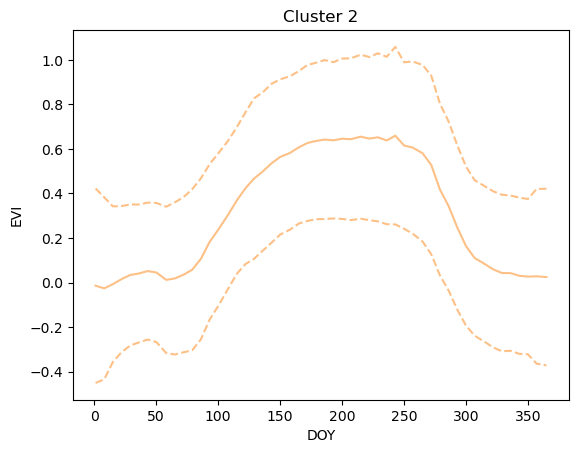

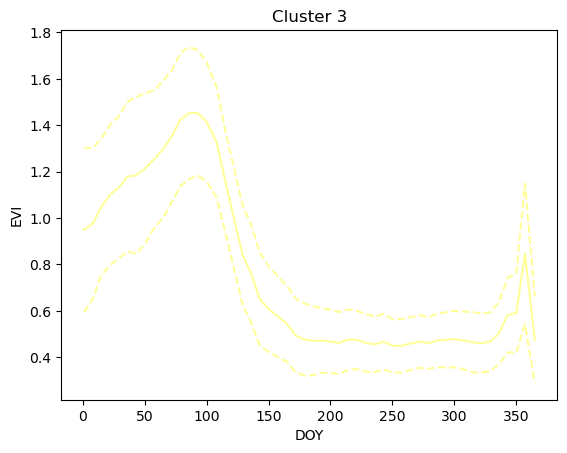

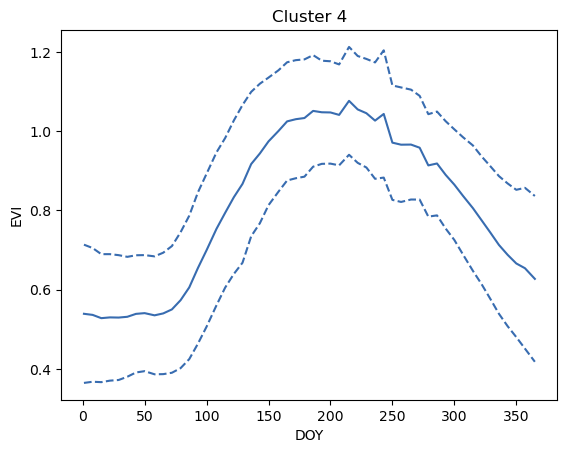

In [65]:
for i in range(5):
    f = pd.DataFrame([mean_phen.iloc[i,:] - std_phen.iloc[i,:],
                       mean_phen.iloc[i,:],
                       mean_phen.iloc[i,:] + std_phen.iloc[i,:]])

    ax = f.T.plot(color=col[i], legend=False, style=['--','-','--'])
    ax.set_xlabel("DOY")
    ax.set_ylabel("EVI")
    plt.title('Cluster '+str(i))

    plt.savefig('figures/PhenoCluster'+str(i)+'_.png')

In [68]:
# load LSP metrics
lsp.columns = ['Clusters', 'SOS', 'POS', 'EOS', 'vSOS', 'vPOS', 'vEOS', 'LOS', 'MSP', 'MAU',
               'vMSP', 'vMAU', 'AOS', 'IOS', 'ROG', 'ROS', 'SW']
lsp.columns
# lsp.Clusters[lsp.Clusters == 0.0] = "0"
# lsp[lsp.Clusters == 0.0] = "1"
# lsp[lsp.Clusters == 0.0] = "2"
# lsp[lsp.Clusters == 0.0] = "3"
# lsp[lsp.Clusters == 0.0] = "4"

Index(['Clusters', 'SOS', 'POS', 'EOS', 'vSOS', 'vPOS', 'vEOS', 'LOS', 'MSP',
       'MAU', 'vMSP', 'vMAU', 'AOS', 'IOS', 'ROG', 'ROS', 'SW'],
      dtype='object')

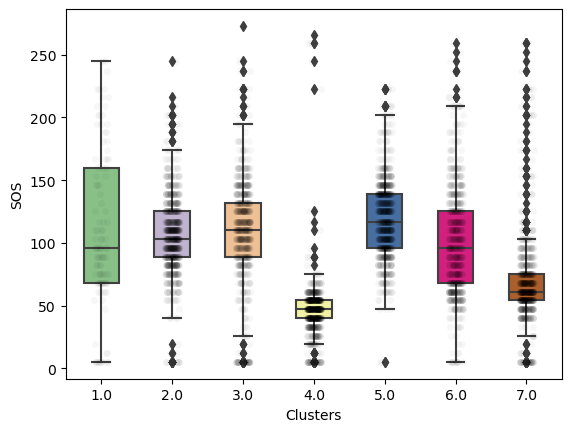

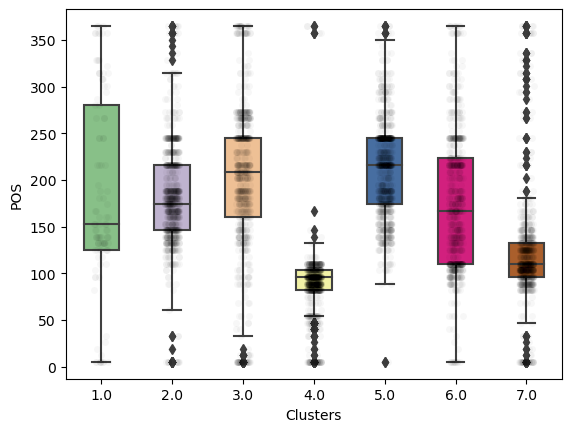

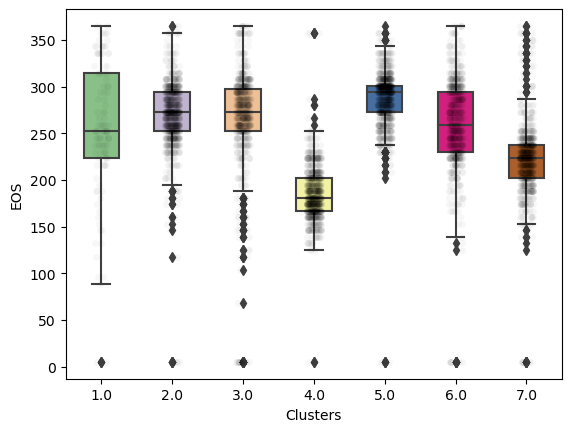

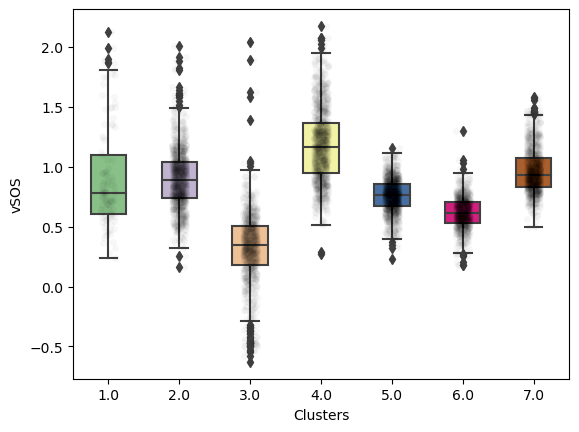

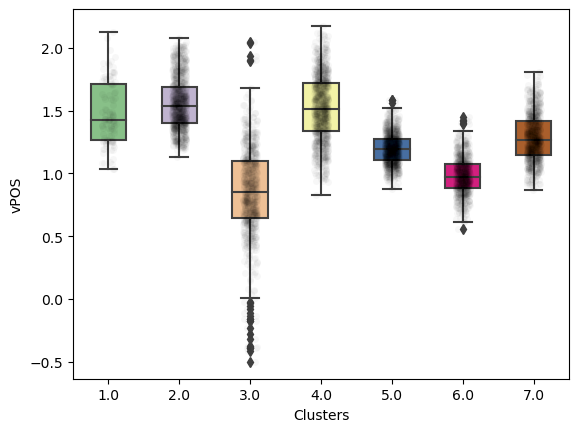

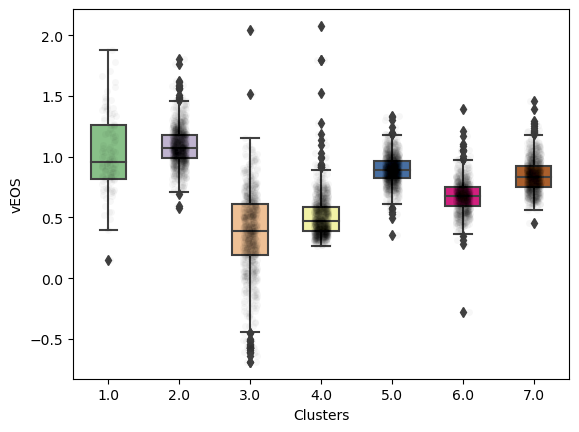

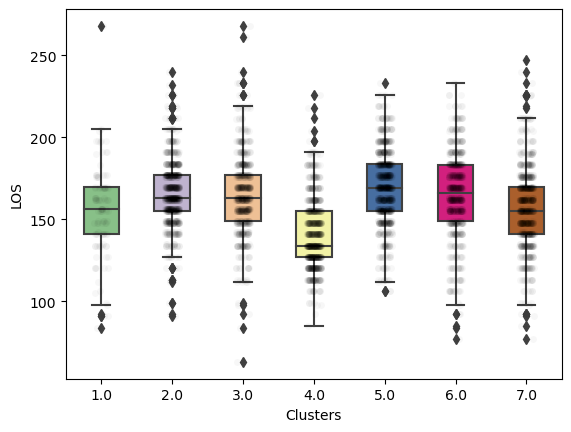

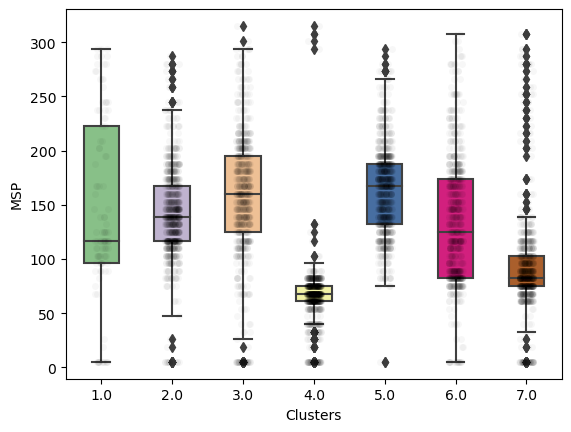

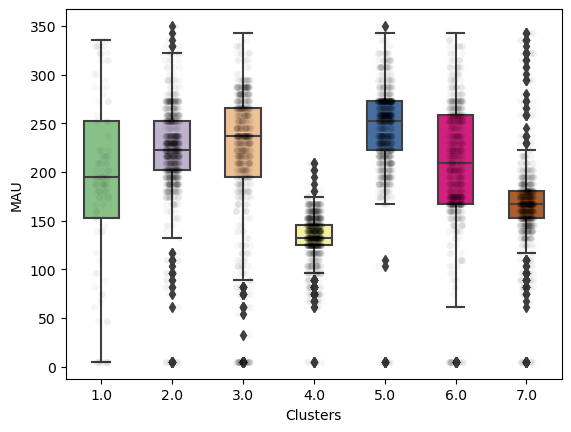

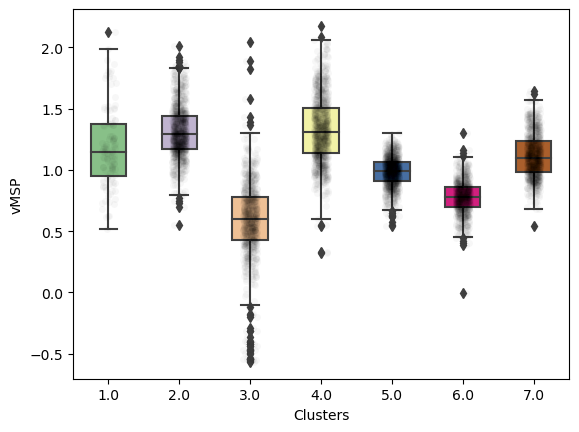

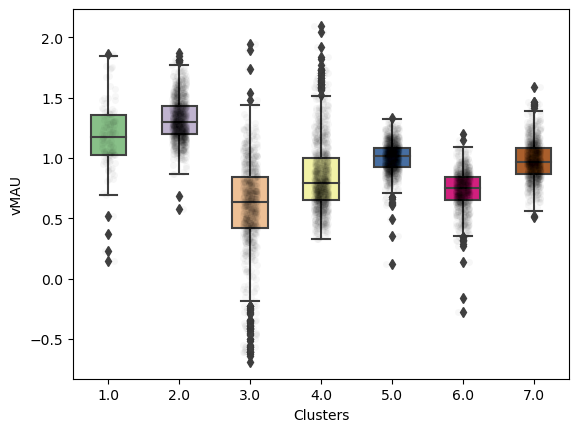

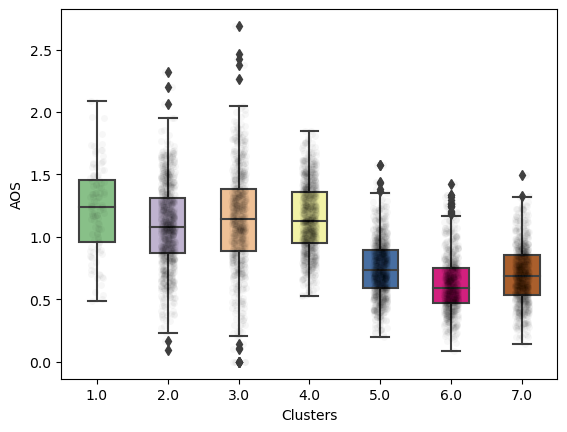

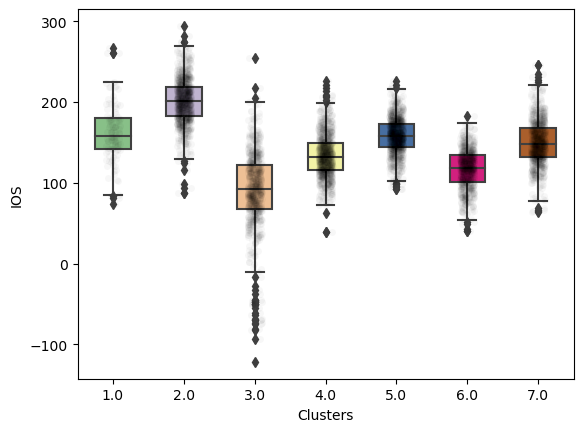

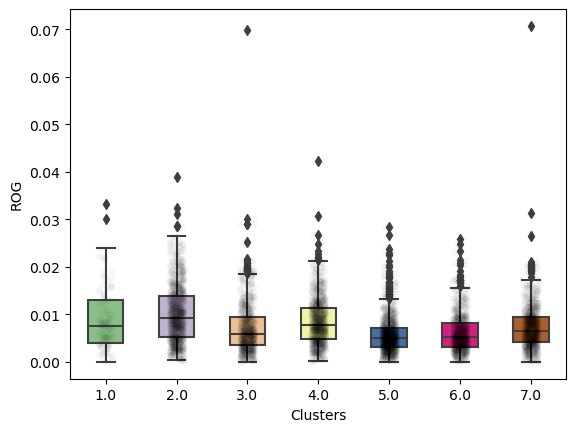

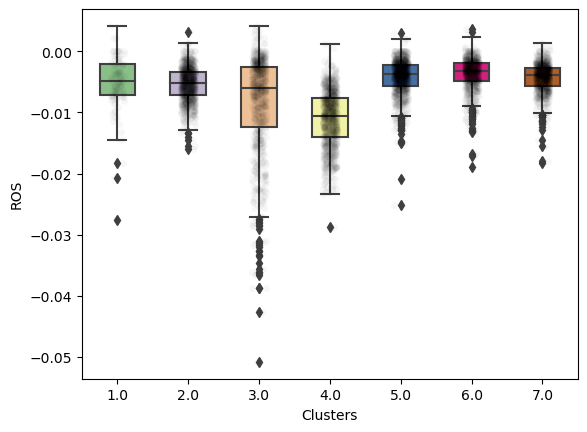

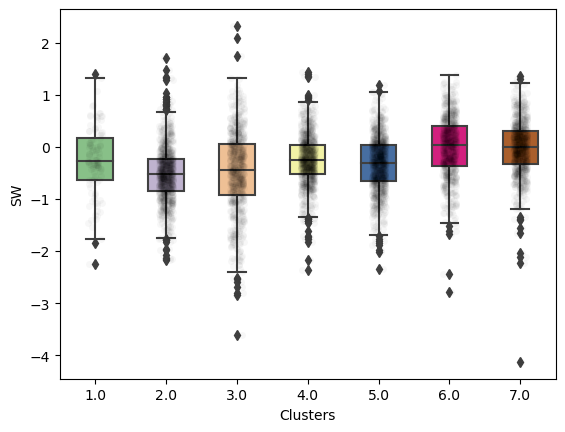

In [84]:
import seaborn as sns

# sample 5000 random rows from lsp
lsp_random = lsp.sample(n=5000, random_state=1)

for lspi in lsp.columns[1:]:
#lspi=lsp_list[0]
    ax = sns.boxplot(y=lsp_random[lspi], x=lsp_random['Clusters'],
                     width=0.5,
                     palette=col)

    ax = sns.stripplot(y=lsp_random[lspi], x=lsp_random['Clusters'], 
                       jitter=True, 
                       marker='o', 
                       alpha=0.03,
                       color='black')
    plt.savefig('figures/boxplot_'+lspi+'.png', dpi=300)
    plt.show()
    

# order = ["0","1","2","3","4"]
# pairs = [('0','1'),('0','2'),('0','3'),('0','4'),
#                                ('1','2'),('1','3'),('1','4'),
#                                ('2','3'),('2','4'),
#                                ('3','4')]

# pairs = [(0.0,1.0),(0.0,2.0),(0.0,3.0),(0.0,4.0),
#                                (1.0,2.0),(1.0,3.0),(1.0,4.0),
#                                (2.0,3.0),(2.0,4.0),
#                                (3.0,4.0)]
# pairs=[("0", "1"), ("0", "2"), ("0", "3")]
# annotator = Annotator(ax, pairs, data=lsp, x='Clusters', y=lspi, order=order)
# annotator.configure(test='Mann-Whitney', text_format='star', loc='outside')
# annotator.apply_and_annotate()
# # #plt.savefig('boxplot_'+lspi+'_.png')



In [75]:
dem

,cluster,dem
0,3.0,2754.0
1,3.0,2675.0
2,4.0,2924.0
3,4.0,3004.0
4,4.0,3110.0
...,...,...
1913865,3.0,15914.0
1913866,4.0,6453.0
1913867,3.0,22268.0
1913868,3.0,11390.0


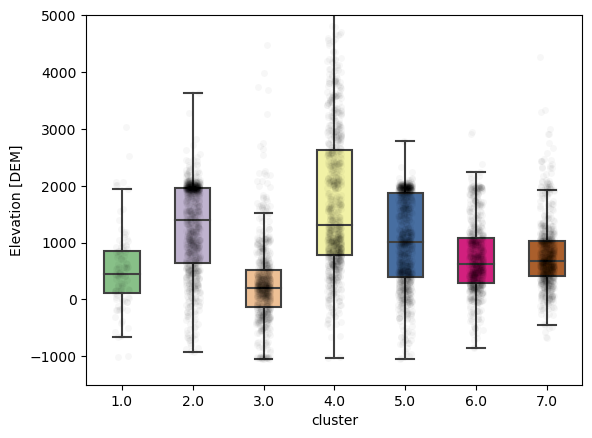

In [86]:
# sample 5000 random rows from dem
dem_random = dem.sample(n=5000, random_state=1)

ax = sns.boxplot(y=dem_random.dem, x=dem_random['cluster'],
                 width=0.5,
                 palette=col,
                 showfliers = False)

ax = sns.stripplot(y=dem_random.dem, x=lsp_random['Clusters'], 
                   jitter=True, 
                   marker='o', 
                   alpha=0.03,
                   color='black').set(ylabel='Elevation [DEM]')
plt.ylim(-1500, 5000)
plt.savefig('figures/boxplot_dem_veg', dpi=300)
plt.show()